In [12]:
import sys
sys.path.append('../') 
import pandas as pd
from Src.load_dataset import load_dataset
from Src.preprocessing import preprocess_data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
dataset, documents, true_labels = load_dataset()


Loading 20 Newsgroups Dataset...

Loaded 2588 documents.


In [14]:
df = pd.DataFrame({'category': true_labels, 'text': documents})
df['category_name'] = df['category'].apply(lambda x: dataset.target_names[x])
df

,category,text,category_name
0,1,\n\nI think I can. Largely as a result of effo...,sci.space
1,0,"In regards to fractal commpression, I have see...",comp.graphics
2,1,Background: The Orion spacedrive was a theoret...,sci.space
3,2,930418\n\nDo what thou wilt shall be the whole...,talk.religion.misc
4,1,,sci.space
...,...,...,...
2583,0,\nI get regular questions about gamma correcti...,comp.graphics
2584,2,"\n\nWhen Robert refers to the ""orthodox"", he i...",talk.religion.misc
2585,0,Hello there!\n\nA week ago a guy asked what a ...,comp.graphics
2586,0,I've been playing with a program called PICLAB...,comp.graphics


In [15]:
df['cleaned_text'] = df['text'].apply(preprocess_data)

In [16]:
df.head()

,category,text,category_name,cleaned_text
0,1,\n\nI think I can. Largely as a result of effo...,sci.space,think largely result efforts people reading gr...
1,0,"In regards to fractal commpression, I have see...",comp.graphics,regards fractal commpression seen fractal comp...
2,1,Background: The Orion spacedrive was a theoret...,sci.space,background orion spacedrive theoretical concep...
3,2,930418\n\nDo what thou wilt shall be the whole...,talk.religion.misc,thou wilt shall whole law honestly word sin re...
4,1,,sci.space,


C:\Users\abdal\AppData\Local\Temp\ipykernel_10064\1894411817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['category_name'], palette="viridis")


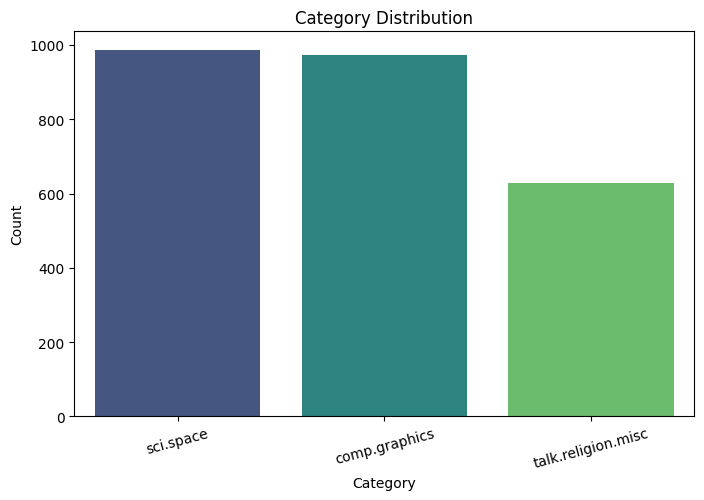

In [17]:
# ----------------
# Class Distribution
# ----------------

plt.figure(figsize=(8, 5))
sns.countplot(x=df['category_name'], palette="viridis")
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

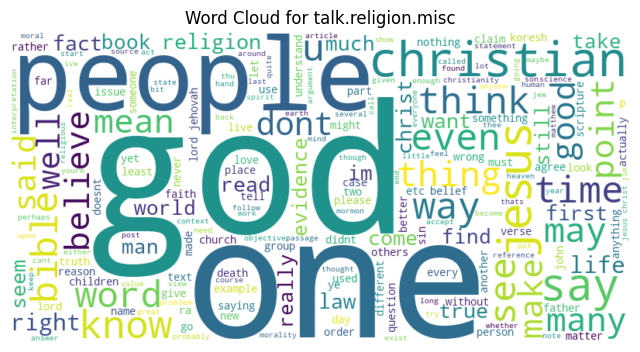

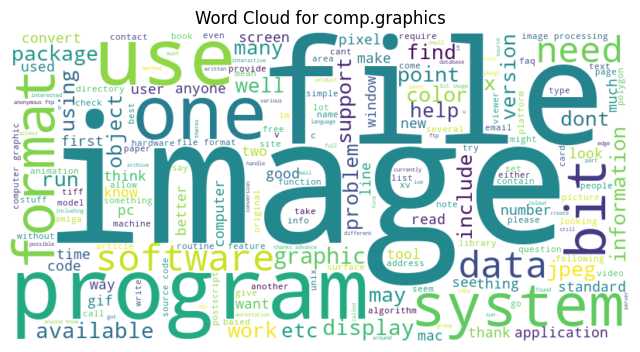

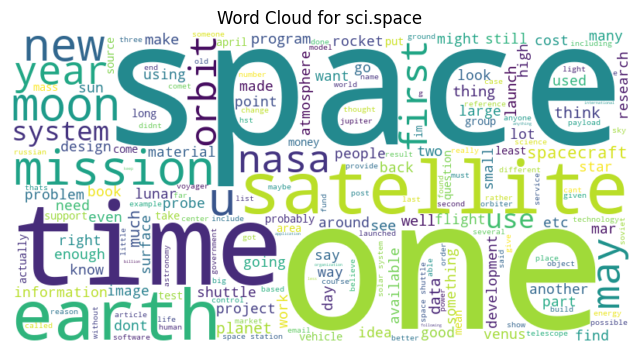

In [18]:
# ----------------
# Word Cloud for Each Category
# ----------------

def plot_wordcloud(category):
    text = " ".join(df[df['category_name'] == category]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {category}")
    plt.show()
    
categories = ['talk.religion.misc', 'comp.graphics', 'sci.space']

for cat in categories:
    plot_wordcloud(cat)

C:\Users\abdal\AppData\Local\Temp\ipykernel_10064\51741449.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


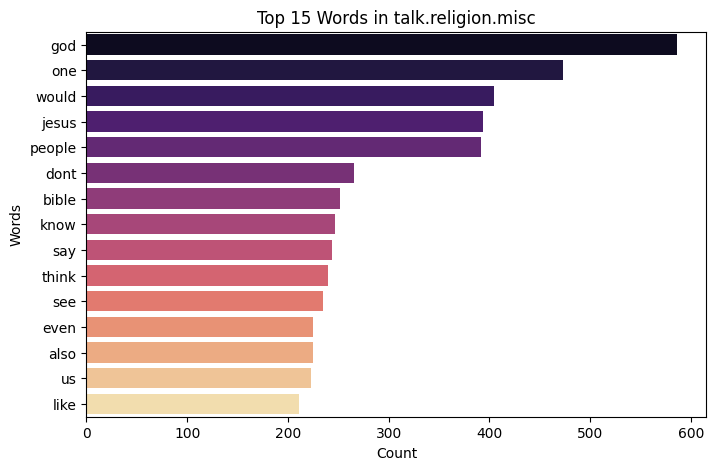

C:\Users\abdal\AppData\Local\Temp\ipykernel_10064\51741449.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


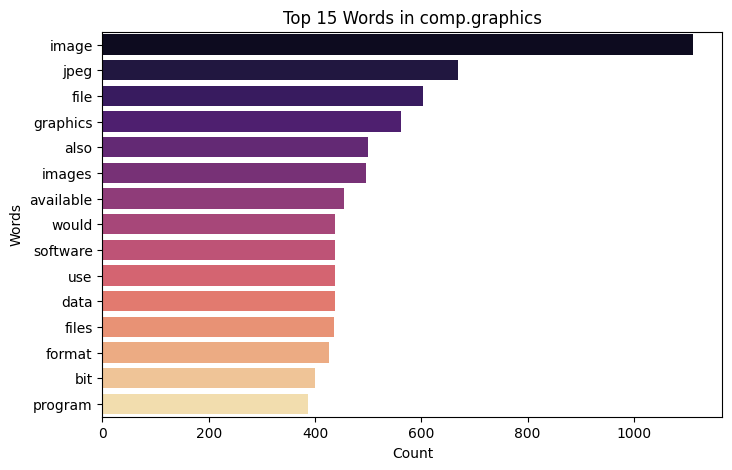

C:\Users\abdal\AppData\Local\Temp\ipykernel_10064\51741449.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


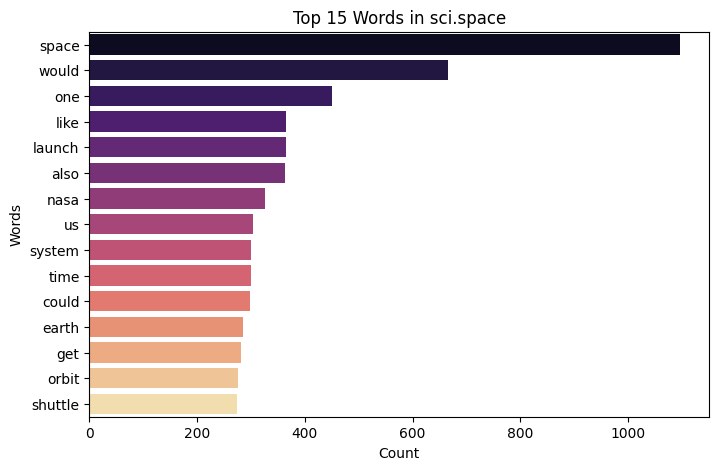

In [19]:
# ----------------
# Most Frequent Words
# ----------------

def plot_top_words(category, n=15):
    text = " ".join(df[df['category_name'] == category]['cleaned_text'])
    words = text.split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(n)

    words, counts = zip(*common_words)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(counts), y=list(words), palette="magma")
    plt.xlabel("Count")
    plt.ylabel("Words")
    plt.title(f"Top {n} Words in {category}")
    plt.show()

for cat in categories:
    plot_top_words(cat)

C:\Users\abdal\AppData\Local\Temp\ipykernel_10064\2541521189.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette="magma")


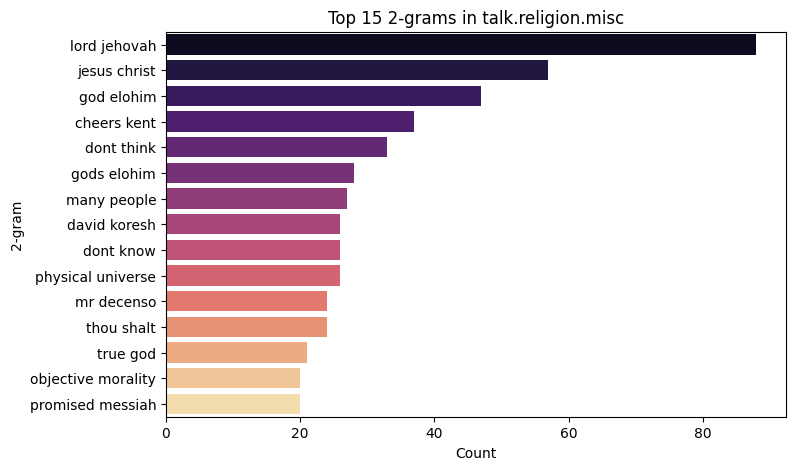

C:\Users\abdal\AppData\Local\Temp\ipykernel_10064\2541521189.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette="magma")


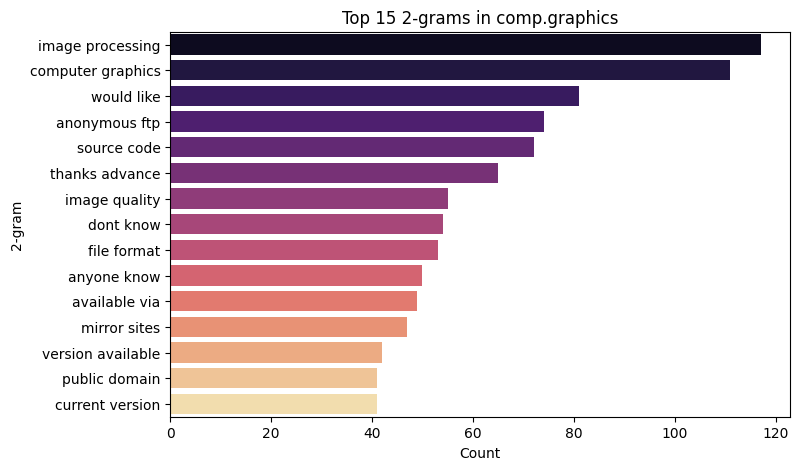

C:\Users\abdal\AppData\Local\Temp\ipykernel_10064\2541521189.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette="magma")


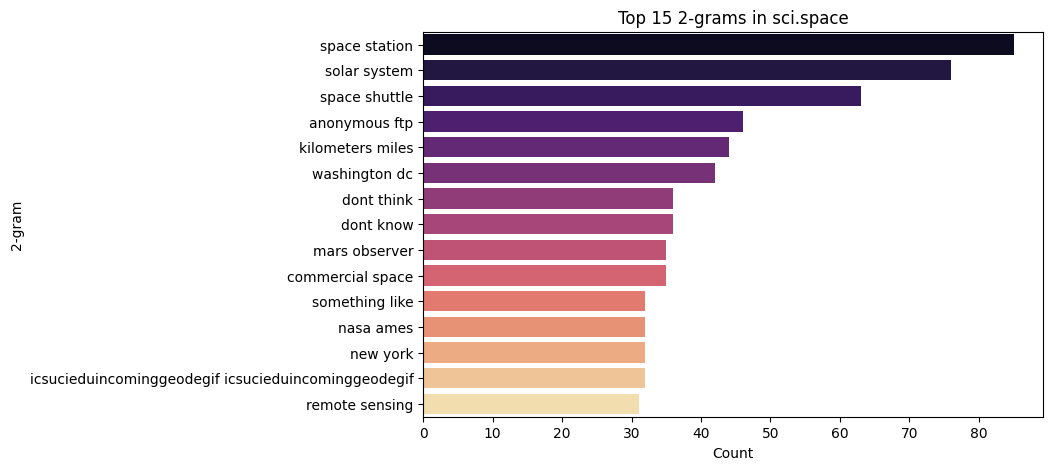

In [20]:
# ----------------
# Function to plot top 2-grams
# ----------------

def plot_top_ngrams(category, n=15, ngram_size=2):
    text = " ".join(df[df['category_name'] == category]['cleaned_text'])
    words = nltk.word_tokenize(text)
    
    # Generate n-grams
    n_grams = ngrams(words, ngram_size)
    
    # Count frequency of n-grams
    ngram_counts = Counter(n_grams)
    common_ngrams = ngram_counts.most_common(n)

    # Format n-grams for display
    ngram_labels = [' '.join(ngram) for ngram, _ in common_ngrams]
    counts = [count for _, count in common_ngrams]

    # Plotting
    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts, y=ngram_labels, palette="magma")
    plt.xlabel("Count")
    plt.ylabel(f"{ngram_size}-gram")
    plt.title(f"Top {n} {ngram_size}-grams in {category}")
    plt.show()

# Example for plotting bigrams (2-grams) for each category
for cat in categories:
    plot_top_ngrams(cat, n=15, ngram_size=2)


C:\Users\abdal\AppData\Local\Temp\ipykernel_10064\3683901464.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette="magma")


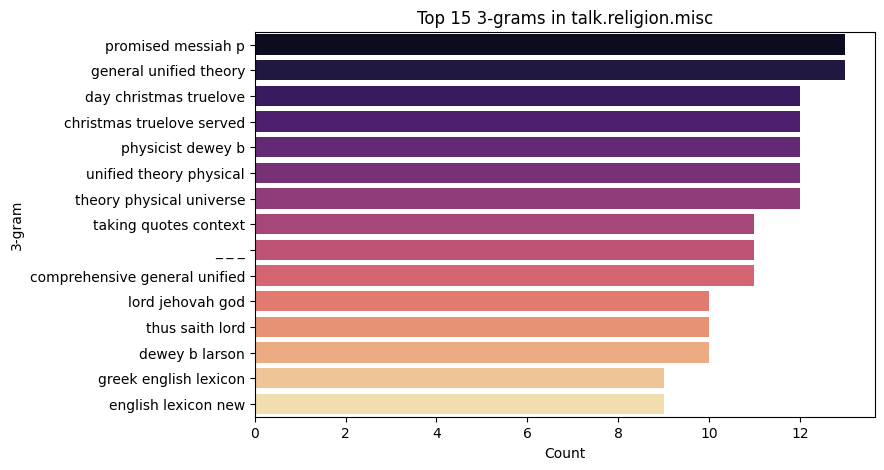

C:\Users\abdal\AppData\Local\Temp\ipykernel_10064\3683901464.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette="magma")


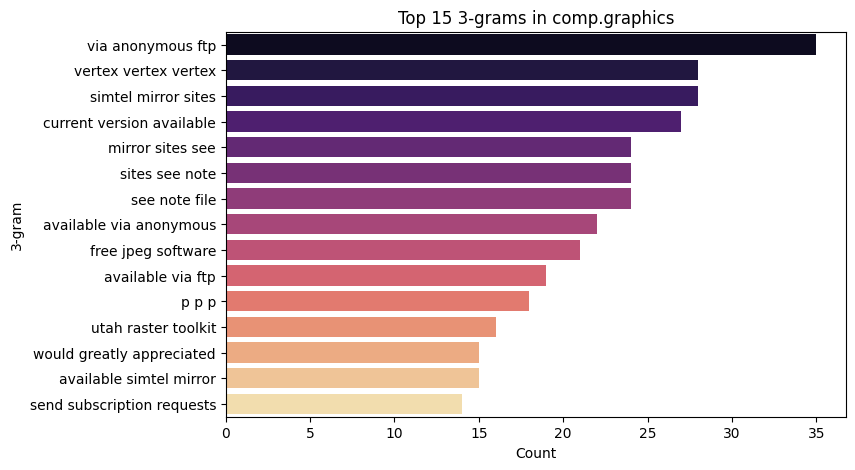

C:\Users\abdal\AppData\Local\Temp\ipykernel_10064\3683901464.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette="magma")


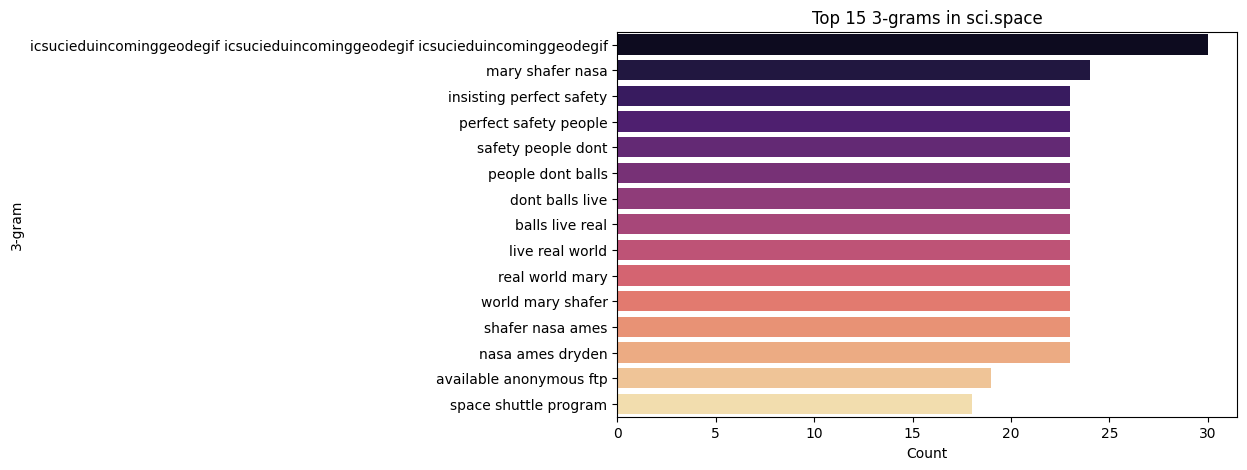

In [21]:
# ----------------
# Function to plot top 3-grams
# ----------------

def plot_top_ngrams(category, n=15, ngram_size=3):
    text = " ".join(df[df['category_name'] == category]['cleaned_text'])
    words = nltk.word_tokenize(text)
    
    # Generate n-grams
    n_grams = ngrams(words, ngram_size)
    
    # Count frequency of n-grams
    ngram_counts = Counter(n_grams)
    common_ngrams = ngram_counts.most_common(n)

    # Format n-grams for display
    ngram_labels = [' '.join(ngram) for ngram, _ in common_ngrams]
    counts = [count for _, count in common_ngrams]

    # Plotting
    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts, y=ngram_labels, palette="magma")
    plt.xlabel("Count")
    plt.ylabel(f"{ngram_size}-gram")
    plt.title(f"Top {n} {ngram_size}-grams in {category}")
    plt.show()

# Example for plotting trigrams (3-grams) for each category
for cat in categories:
    plot_top_ngrams(cat, n=15, ngram_size=3)


In [22]:
# ----------------
# TF-IDF Feature Importance
# ----------------
tfidf = TfidfVectorizer(max_features=20)
X_tfidf = tfidf.fit_transform(df['cleaned_text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

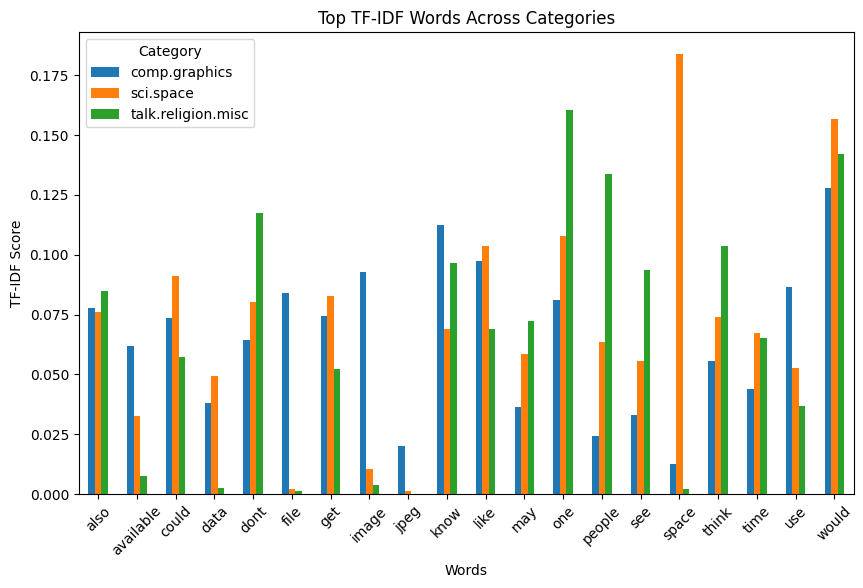

In [23]:
# Top TF-IDF words per category
category_means = df.groupby('category_name').apply(lambda x: tfidf_df.iloc[x.index].mean())
category_means.T.plot(kind='bar', figsize=(10, 6))
plt.title("Top TF-IDF Words Across Categories")
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()
